In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [111]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Exploratory Data Analysis (EDA):

In [113]:
df.shape

(214, 10)

In [114]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [115]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [117]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [118]:
df.duplicated().sum()

1

In [119]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df.reset_index(drop=True, inplace=True)

In [122]:
df.duplicated().sum()

0

In [123]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

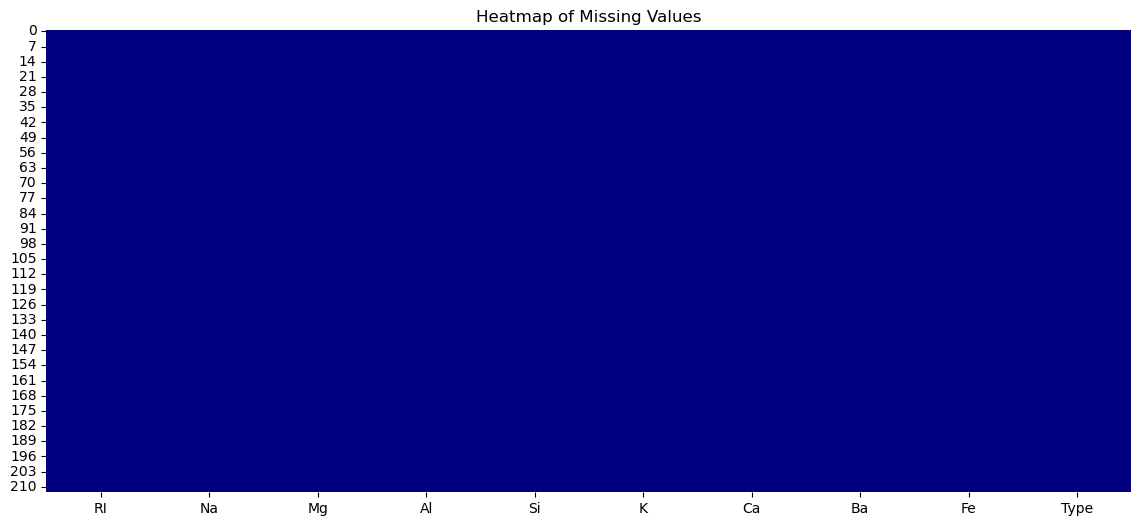

In [124]:
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours, cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [125]:
for col in df:
    print({col:df[col].nunique()})

{'RI': 178}
{'Na': 142}
{'Mg': 94}
{'Al': 118}
{'Si': 133}
{'K': 65}
{'Ca': 143}
{'Ba': 34}
{'Fe': 32}
{'Type': 6}


In [126]:
for col in df:
    print({col:df[col].unique()})

{'RI': array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.523  , 1.51574, 1.51848, 1.51593, 1.51631,
       1.5159 , 1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594,
       1.51409, 1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588,
       1.51629, 1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 ,
       1.52725, 1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818,
       1.52664, 1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829,
       1.5170

In [127]:
for col in df:
    print(df[col].value_counts())

RI
1.51645    3
1.52152    3
1.51590    3
1.51674    2
1.51769    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64
Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.31    1
14.17    1
13.51    1
13.81    1
14.23    1
Name: count, Length: 142, dtype: int64
Mg
0.00    42
3.48     8
3.54     8
3.58     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64
Al
1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64
Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
72.34    1
72.26    1
73.26    1
73.25    1
73.61    1
Name: count, Length: 133, dtype: int64
K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64
Ca
8.03    5
8

# Data Visualization:

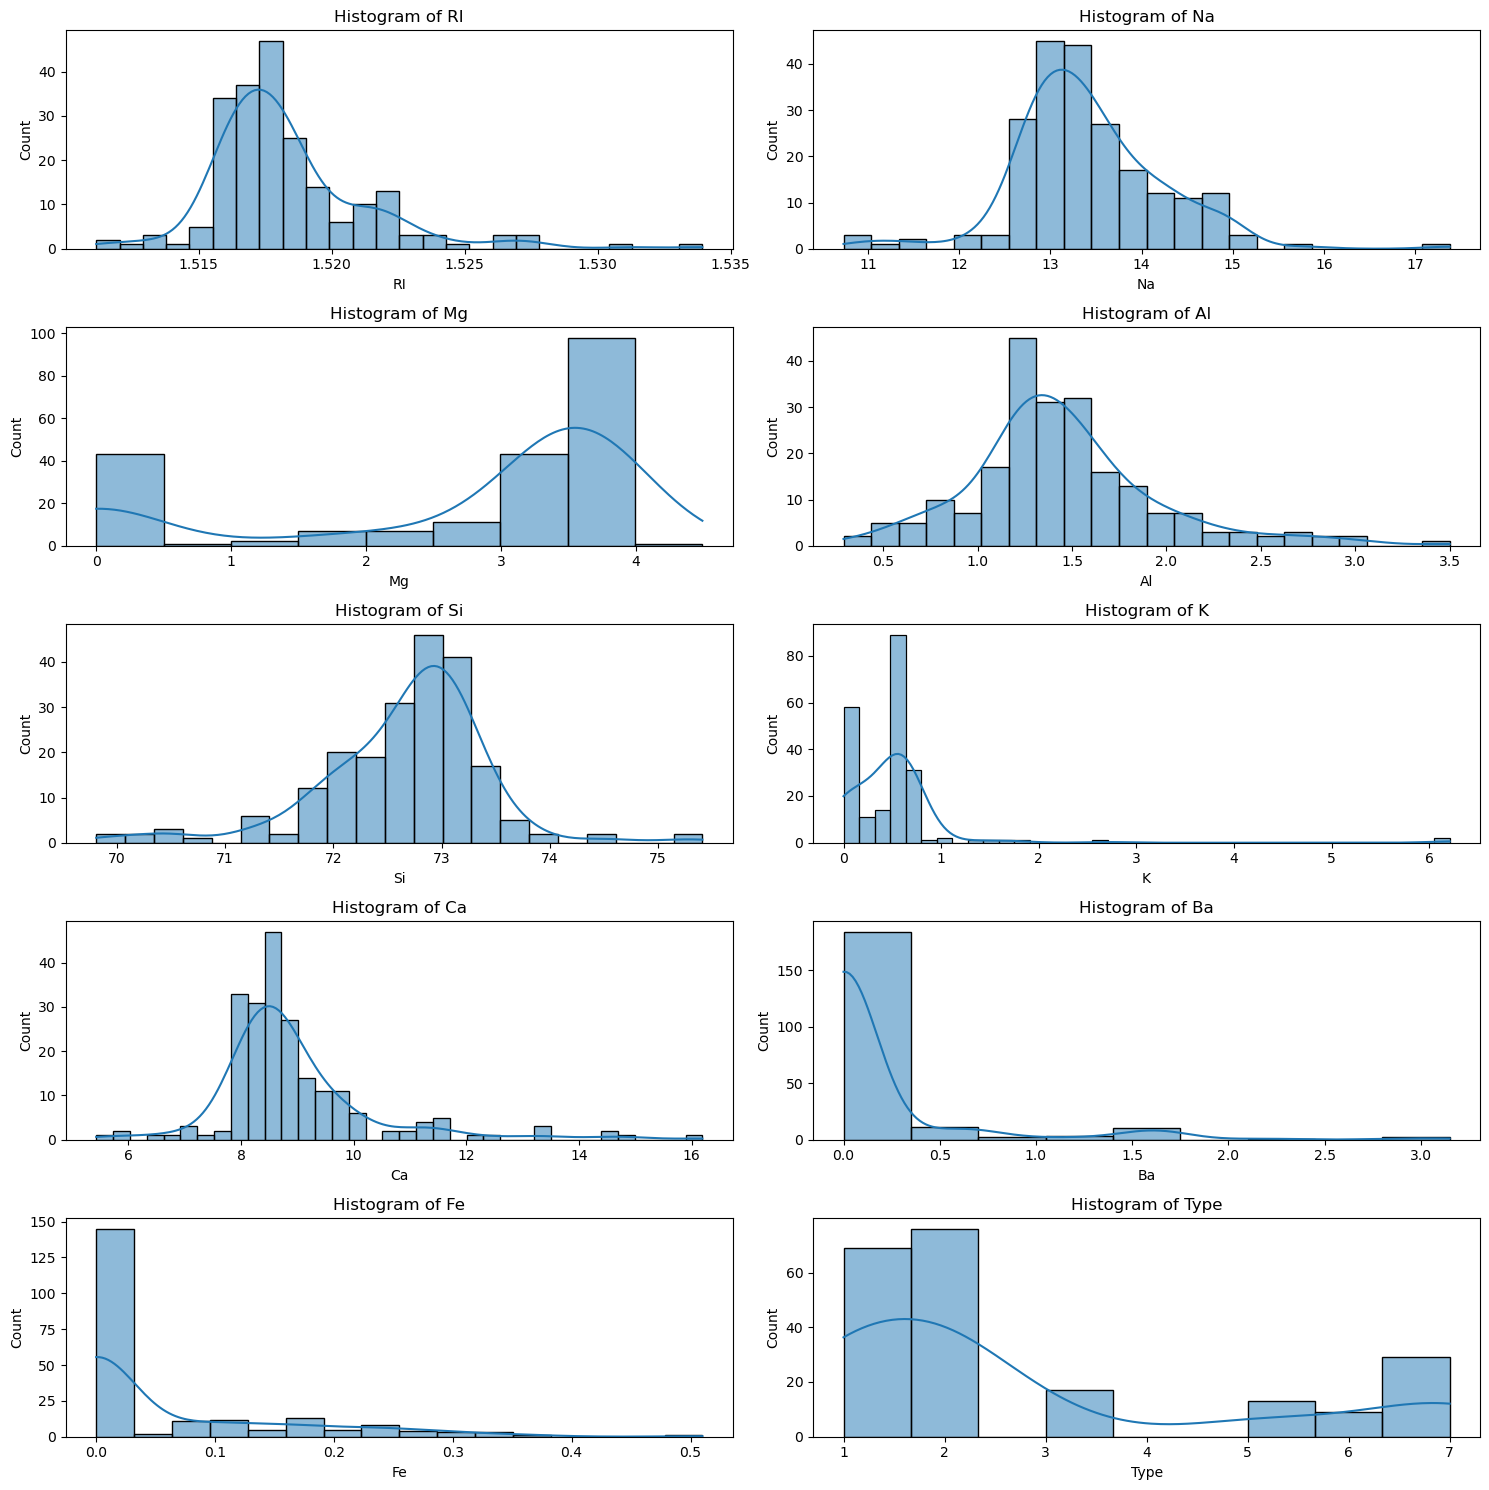

In [129]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

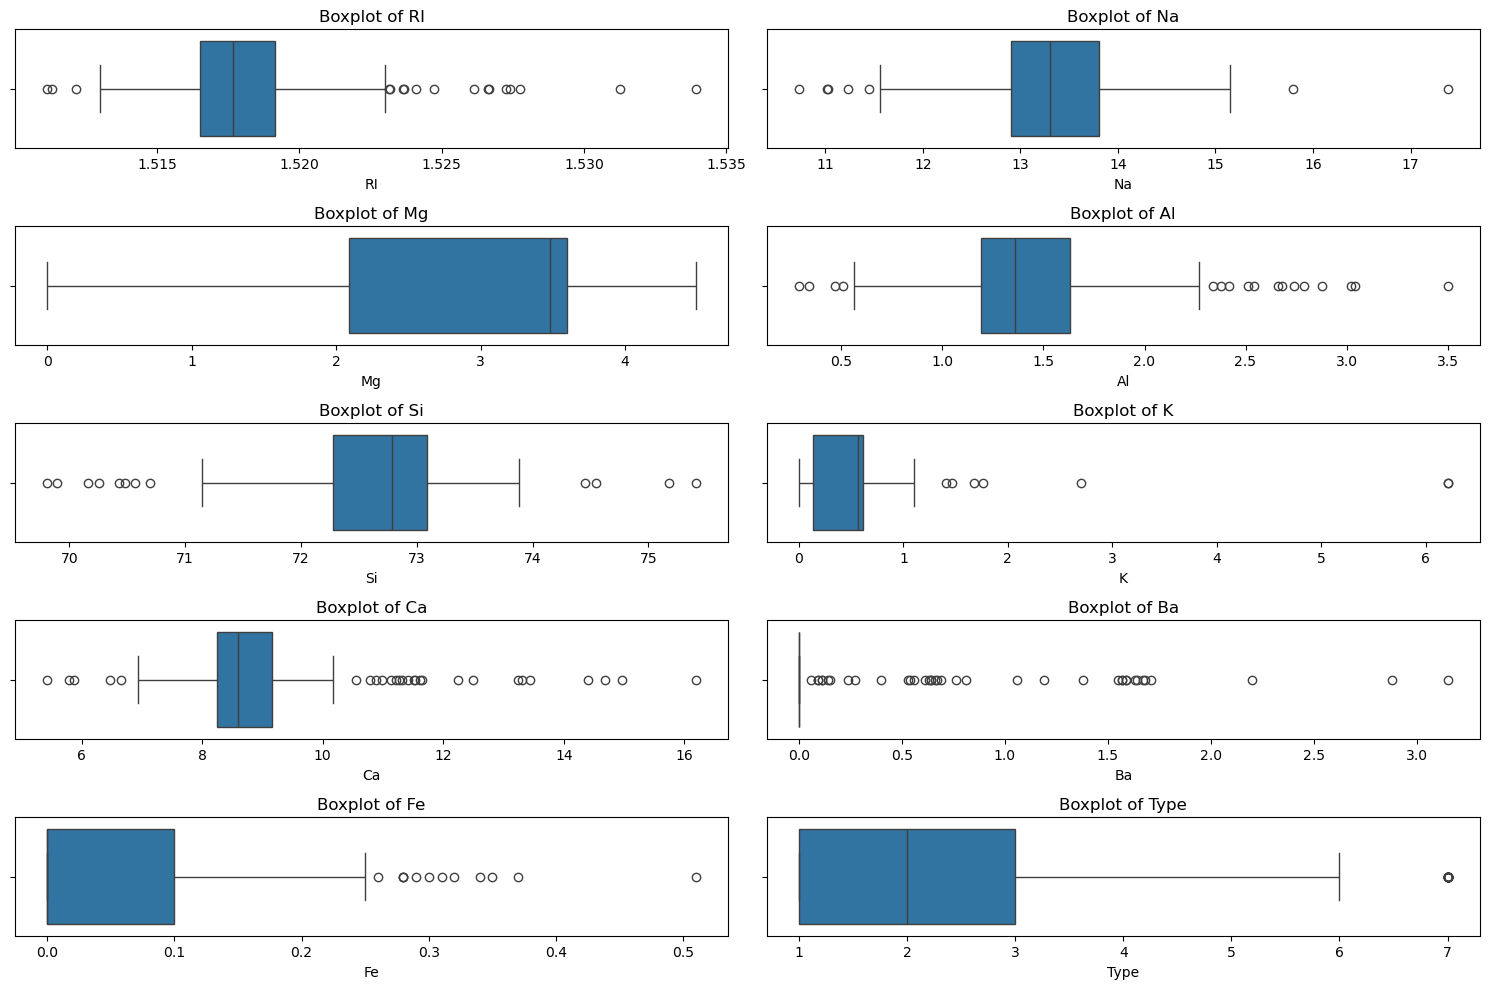

In [130]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

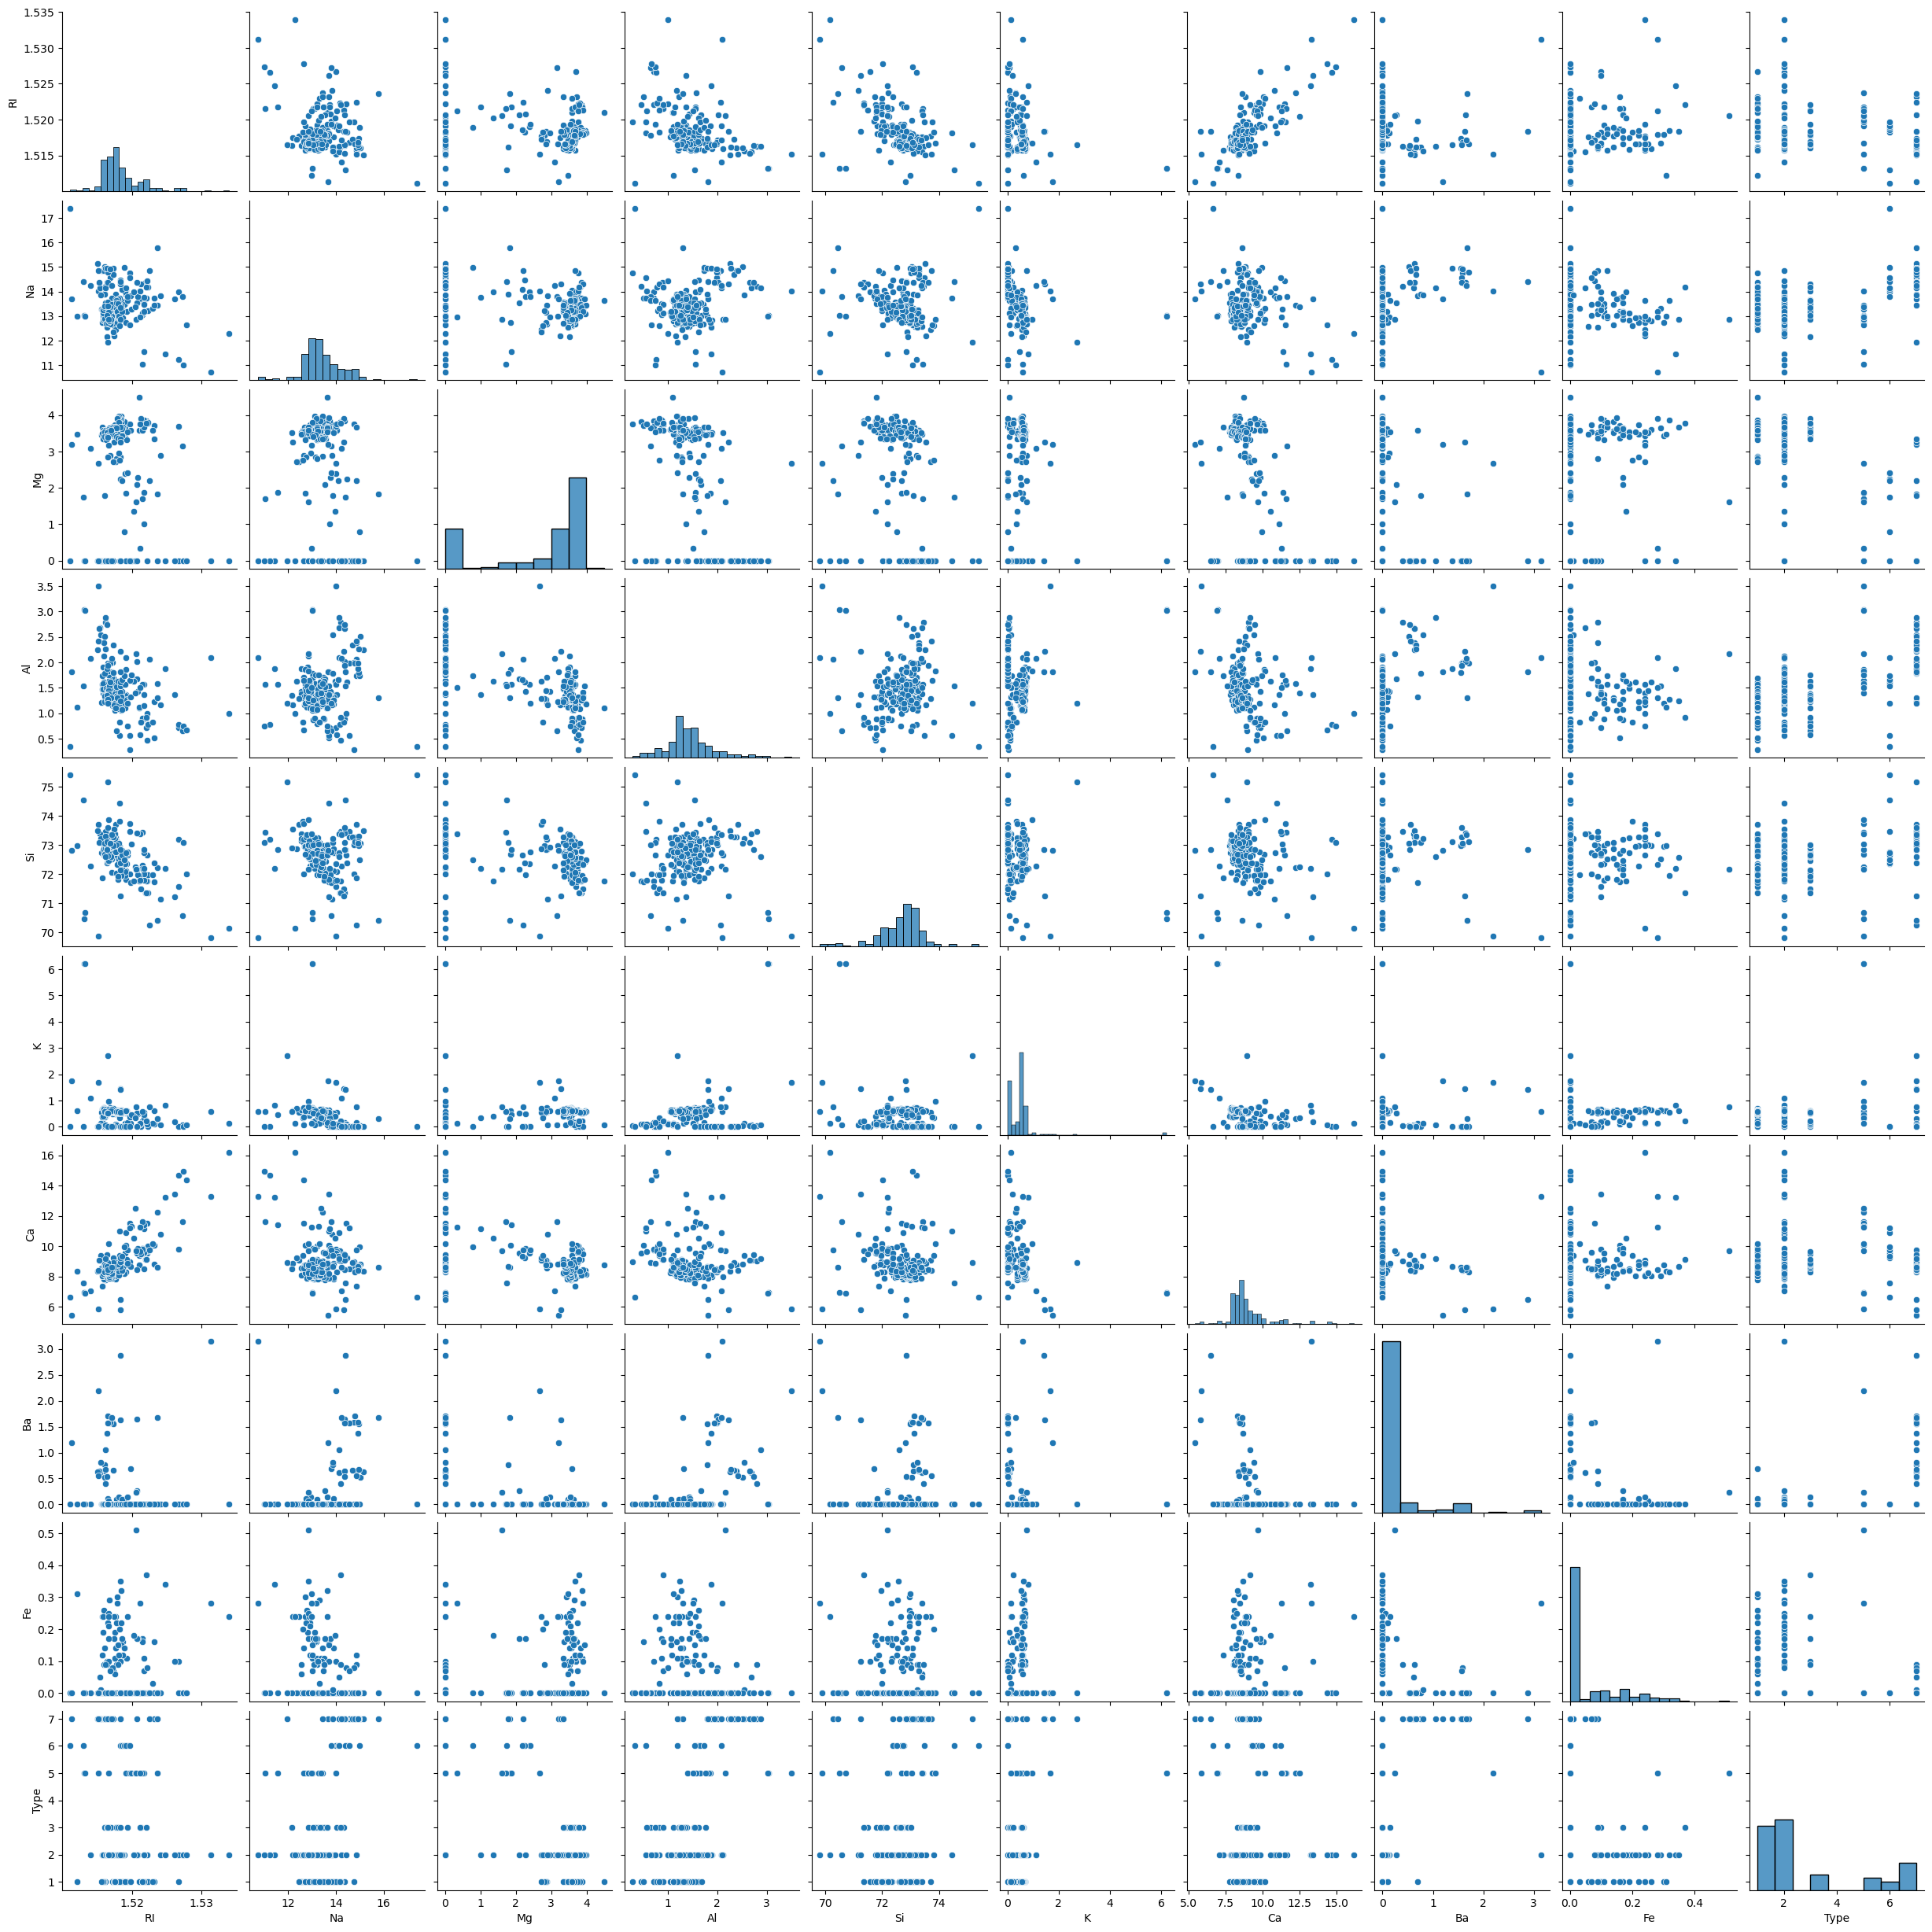

In [131]:
# Pair plots to visualize relationships between features
sns.pairplot(df)

In [132]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


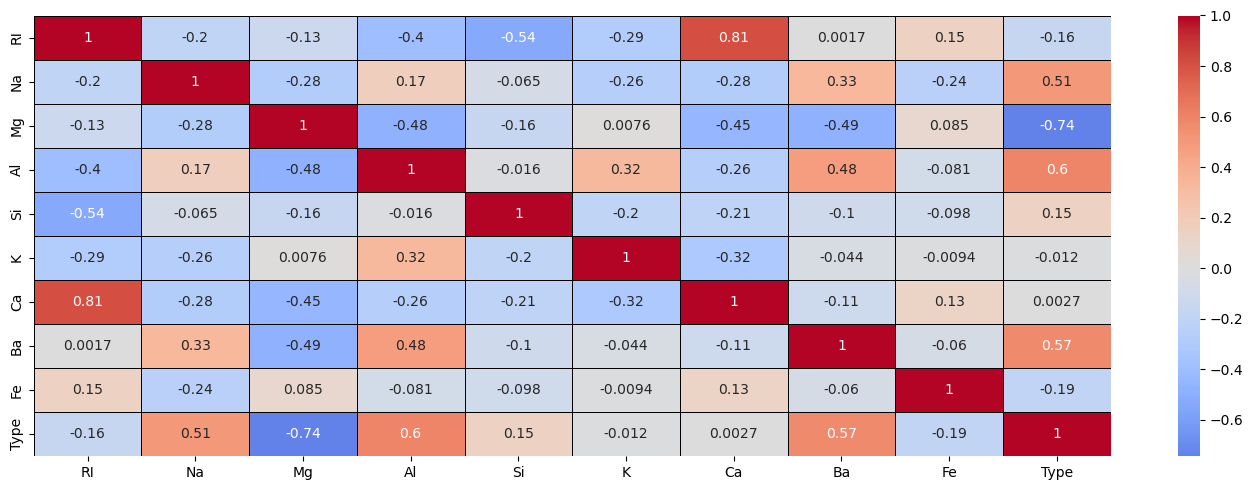

In [133]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [135]:
# There are no missing values

In [136]:
# there are no categorical variables

In [137]:
# Split the data into train and test sets
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [138]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling Imbalanced Data

In [140]:
# Handling imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Random Forest Model Implementation

In [142]:
# StratifiedKFold setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [143]:
# Randomized Search for Random Forest
param_distributions_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [144]:
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                       param_distributions=param_distributions_rf,
                                       cv=cv, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [145]:
# Best parameters and model
best_rf = random_search_rf.best_estimator_
print("Best parameters for Random Forest:", random_search_rf.best_params_)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}


In [146]:
# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

In [147]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.85      0.73      0.79        15
           3       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.81      0.89      0.83        43
weighted avg       0.85      0.81      0.82        43



In [148]:
# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("Random Forest Classifier Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Mean Cross-Validation Accuracy Score:", cv_scores_rf.mean())

Random Forest Classifier Cross-Validation Accuracy Scores: [0.81081081 0.89041096 0.83561644 0.95890411 0.91780822]
Mean Cross-Validation Accuracy Score: 0.8827101073676417


# Bagging and Boosting Methods

In [150]:
# Randomized Search for Bagging
param_distributions_bagging = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

In [151]:
random_search_bagging = RandomizedSearchCV(estimator=BaggingClassifier(estimator=RandomForestClassifier(), random_state=42),
                                           param_distributions=param_distributions_bagging,
                                           n_iter=5, cv=cv, n_jobs=-1, verbose=2, random_state=42)
random_search_bagging.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=BaggingClassifier(estimator=RandomForestClassifier(),
                                               random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_features': [0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [10, 50]},
                   random_state=42, verbose=2)

In [152]:
# Best parameters and model
best_bagging = random_search_bagging.best_estimator_
print("Best parameters for Bagging:", random_search_bagging.best_params_)

Best parameters for Bagging: {'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0}


In [153]:
# Predictions
y_pred_bagging = best_bagging.predict(X_test_scaled)

In [154]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.77      0.67      0.71        15
           3       0.50      1.00      0.67         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.75      0.87      0.79        43
weighted avg       0.80      0.77      0.77        43



In [155]:
# Cross-validation scores for Bagging
cv_scores_bagging = cross_val_score(best_bagging, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("Bagging Classifier Cross-Validation Accuracy Scores:", cv_scores_bagging)
print("Mean Cross-Validation Accuracy Score:", cv_scores_bagging.mean())

Bagging Classifier Cross-Validation Accuracy Scores: [0.83783784 0.87671233 0.82191781 0.93150685 0.89041096]
Mean Cross-Validation Accuracy Score: 0.8716771566086635


In [156]:
# Randomized Search for AdaBoost
param_distributions_boosting = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

In [157]:
random_search_boosting = RandomizedSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME', random_state=42),
                                            param_distributions=param_distributions_boosting,
                                            cv=cv, n_jobs=-1, verbose=2, random_state=42)
random_search_boosting.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [158]:
# Best parameters and model
best_boosting = random_search_boosting.best_estimator_
print("Best parameters for AdaBoost:", random_search_boosting.best_params_)

Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 0.1}


In [159]:
# Predictions
y_pred_boosting = best_boosting.predict(X_test_scaled)

In [160]:
print(classification_report(y_test, y_pred_boosting))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.67      0.27      0.38        15
           3       0.14      1.00      0.25         3
           5       0.43      1.00      0.60         3
           6       0.33      1.00      0.50         2
           7       1.00      0.17      0.29         6

    accuracy                           0.30        43
   macro avg       0.43      0.57      0.34        43
weighted avg       0.43      0.30      0.26        43



In [161]:
# Cross-validation scores for AdaBoost
cv_scores_boosting = cross_val_score(best_boosting, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("AdaBoost Classifier Cross-Validation Accuracy Scores:", cv_scores_boosting)
print("Mean Cross-Validation Accuracy Score:", cv_scores_boosting.mean())

AdaBoost Classifier Cross-Validation Accuracy Scores: [0.67567568 0.47945205 0.60273973 0.63013699 0.53424658]
Mean Cross-Validation Accuracy Score: 0.5844502036282858
